## Greedy Algorithms
### Knapsack Algorithm

let us learn Fractional Knapsack using the following real life application
You are given a set of files with varying compression ratios
and priorities. Your task is to implement a solution that selects a subset of these files
for compression while staying within a given storage capacity.

Here, i have generated the files randomly

In [1]:
#function to perform sorting for knapsack algorithm
def mergesort(arr, key=None):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        mergesort(left, key=key)
        mergesort(right, key=key)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if (key(left[i]) if key else left[i]) <= (key(right[j]) if key else right[j]):
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

In [23]:
#function for knapsack algorithm
def knapsack(files, capacity, flag):
    output = []
    # 0: compression ratio, 1: priority, 2: compresstion/priority
    if flag == 0:
        mergesort(files, key = lambda x: x[0])
    elif flag == 1:
        mergesort(files, key = lambda x: x[1])
        files.reverse()
    elif flag == 2:
        for sublist in files:
            sublist.append(sublist[1] / sublist[0])
        mergesort(files, key = lambda x: x[2])
        files.reverse()
#     print(files)
    i = 0
    while capacity != 0:
        if capacity < files[i][0]:
            meow = capacity/files[i][0]
            for j in range (0,2):
                files[i][j] *= meow
        capacity -= files[i][0]
        output.append(files[i])
        i += 1
    #calculating total profit
    profit = 0
    for i in output:
        profit += i[1]
    return output, profit

In [24]:
import random
#generate random data for files
rows = random.randint(5,1000)
columns = 2
capacity = random.randint(10,100)
files = [[random.randint(1, 100) for _ in range(columns)] for _ in range(rows)]

In [25]:
#information about the data generated
print("No of files: ",len(files))
print("Capacity: ",capacity)

No of files:  536
Capacity:  13


In [26]:
#knapsack algorithm time analysis
import time
start = time.perf_counter()
output1, profit1 = knapsack(files, capacity , 0)
end = time.perf_counter()
timetaken1 = end - start

start = time.perf_counter()
output2, profit2 = knapsack(files, capacity , 1)
end = time.perf_counter()
timetaken2 = end - start

start = time.perf_counter()
output3, profit3 = knapsack(files, capacity , 2)
end = time.perf_counter()
timetaken3 = end - start
print("Minimum Weight:")
print("")
print("Output")
print(output1)
print("Profit")
print(profit1)
print("Time Taken (s)")
print(timetaken1)
print("")
print("Maximum Profit:")
print("")
print("Output")
print(output2)
print("Profit")
print(profit2)
print("Time Taken (s)")
print("")
print(timetaken2)
print("Maximum Profit/Compression Ratio:")
print("")
print("Output")
print(output3)
print("Profit")
print(profit3)
print("Time Taken (s)")
print(timetaken3)

Minimum Weight:

Output
[[1, 28, 28.0], [1, 69, 69.0], [2, 32, 16.0], [2, 1, 0.5], [2, 59, 29.5], [2, 45, 22.5], [2, 26, 13.0], [1.0, 47.5, 47.5]]
Profit
307.5
Time Taken (s)
0.0014025000054971315

Maximum Profit:

Output
[[13.0, 15.11627906976744, 1.1627906976744184]]
Profit
15.11627906976744
Time Taken (s)

0.0013551000010920689
Maximum Profit/Compression Ratio:

Output
[[1, 69, 69.0], [1.0, 47.5, 47.5], [2, 59, 29.5], [3, 87, 29.0], [1, 28, 28.0], [3, 76, 25.333333333333332], [2, 45, 22.5]]
Profit
411.5
Time Taken (s)
0.0015163999996730126


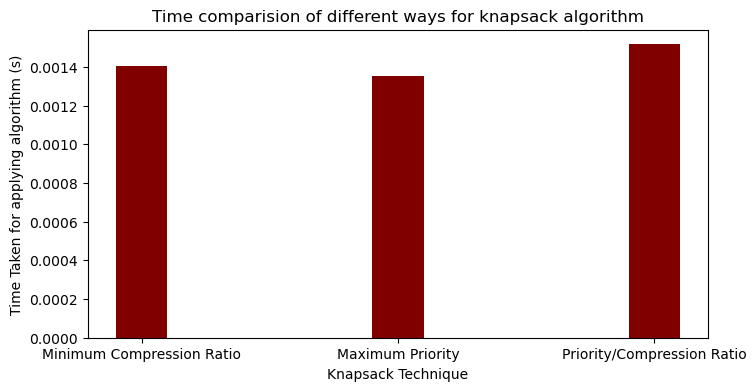

In [27]:
#Graph plotting
import matplotlib.pyplot as plt
technique = ['Minimum Compression Ratio', 'Maximum Priority', 'Priority/Compression Ratio']
values = [timetaken1, timetaken2, timetaken3]
fig = plt.figure(figsize = (8,4))
plt.bar(technique, values, color = 'maroon', width = 0.2)
plt.xlabel("Knapsack Technique")
plt.ylabel("Time Taken for applying algorithm (s)")
plt.title("Time comparision of different ways for knapsack algorithm")
plt.show()

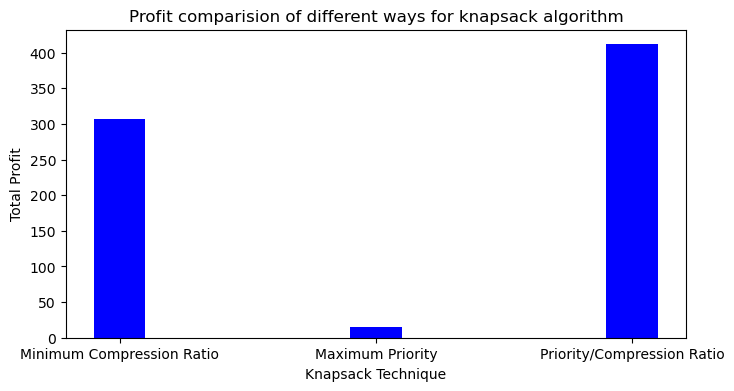

In [28]:
technique = ['Minimum Compression Ratio', 'Maximum Priority', 'Priority/Compression Ratio']
values = [profit1, profit2, profit3]
fig = plt.figure(figsize = (8,4))
plt.bar(technique, values, color = 'blue', width = 0.2)
plt.xlabel("Knapsack Technique")
plt.ylabel("Total Profit")
plt.title("Profit comparision of different ways for knapsack algorithm")
plt.show()

Hence, we can conclude the following:

Knapsack applied in minimum compression ratio results in minimum time and Priority/Compression ratio results in maximum time.

However, Maximum Priority yields minimum profit and Priority/Compression ratio yields in maximum profit.

In [29]:
#run and analyse for many samples
samples = total = 1000
profit1_sum = 0
profit2_sum = 0
profit3_sum = 0
time1_sum = 0
time2_sum = 0
time3_sum = 0
while samples != 0:
    #generate random data for files
    rows = random.randint(5,1000)
    columns = 2
    capacity = random.randint(10,100)
    files = [[random.randint(1, 100) for _ in range(columns)] for _ in range(rows)]
    #knapsack application
    start = time.perf_counter()
    output1, profit1 = knapsack(files, capacity , 0)
    end = time.perf_counter()
    timetaken1 = end - start
    
    start = time.perf_counter()
    output2, profit2 = knapsack(files, capacity , 1)
    end = time.perf_counter()
    timetaken2 = end - start
    
    start = time.perf_counter()
    output3, profit3 = knapsack(files, capacity , 2)
    end = time.perf_counter()
    timetaken3 = end - start
    
    profit1_sum += profit1
    profit2_sum += profit2
    profit3_sum += profit3
    time1_sum += timetaken1
    time2_sum += timetaken2
    time3_sum += timetaken3
    samples -= 1
avg1 = profit1_sum/total
avg2 = profit2_sum/total
avg3 = profit3_sum/total
avgt1 = time1_sum/total
avgt2 = time2_sum/total
avgt3 = time3_sum/total

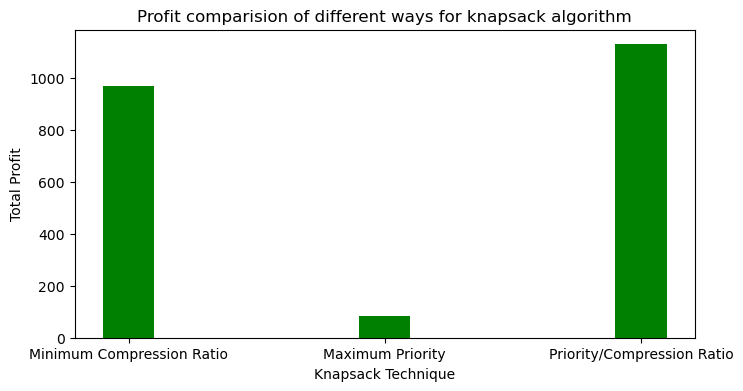

In [30]:
#plotting
technique = ['Minimum Compression Ratio', 'Maximum Priority', 'Priority/Compression Ratio']
values = [avg1, avg2, avg3]
fig = plt.figure(figsize = (8,4))
plt.bar(technique, values, color = 'green', width = 0.2)
plt.xlabel("Knapsack Technique")
plt.ylabel("Total Profit")
plt.title("Profit comparision of different ways for knapsack algorithm")
plt.show()

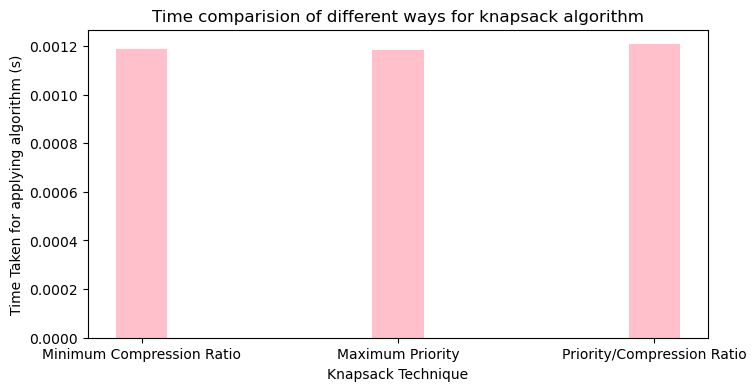

In [31]:
#Graph plotting

technique = ['Minimum Compression Ratio', 'Maximum Priority', 'Priority/Compression Ratio']
values = [avgt1, avgt2, avgt3]
fig = plt.figure(figsize = (8,4))
plt.bar(technique, values, color = 'pink', width = 0.2)
plt.xlabel("Knapsack Technique")
plt.ylabel("Time Taken for applying algorithm (s)")
plt.title("Time comparision of different ways for knapsack algorithm")
plt.show()

Running the same algorithm on 1000 random inputs, we can conclude that:


Knapsack applied in all three ways results in similar average time.

However, Maximum Priority yields minimum profit and Priority/Compression ratio yields in maximum profit.


Therefore we can comclude that Priority/Compression Ratio results in the best average time and profit compromise.